In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
df_campaigns = pd.read_csv("../data/raw/dim_campaigns.csv")
print(df_campaigns.shape)
df_campaigns.head()

(2, 4)


,campaign_id,campaign_name,start_date,end_date
0,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023
1,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024


In [4]:
df_products = pd.read_csv("../data/raw/dim_products.csv")
print(df_products.shape)
df_products.head(15)



(15, 3)


,product_code,product_name,category
0,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples
1,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
2,P03,Atliq_Suflower_Oil (1L),Grocery & Staples
3,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
4,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care
5,P06,Atliq_Fusion_Container_Set_of_3,Home Care
6,P09,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care
7,P10,Atliq_Cream_Beauty_Bathing_Soap (125GM),Personal Care
8,P13,Atliq_High_Glo_15W_LED_Bulb,Home Appliances
9,P14,Atliq_waterproof_Immersion_Rod,Home Appliances


In [5]:
df_stores = pd.read_csv("../data/raw/dim_stores.csv")
print(df_stores.shape)
df_stores.head()

(50, 2)


,store_id,city
0,STTRV-0,Trivandrum
1,STMDU-3,Madurai
2,STHYD-6,Hyderabad
3,STVSK-1,Visakhapatnam
4,STCBE-3,Coimbatore


In [17]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   store_id  50 non-null     object
 1   city      50 non-null     object
dtypes: object(2)
memory usage: 932.0+ bytes


In [6]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   store_id  50 non-null     object
 1   city      50 non-null     object
dtypes: object(2)
memory usage: 932.0+ bytes


In [7]:
df_events = pd.read_csv("../data/raw/fact_events.csv")
print(df_events.shape)
df_events.head()

(1510, 9)


,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272


#### The operations team wants to ensure the integrity of the events data by removing duplicates. Check for and remove duplicate rows in the events dataframe based on store_id, campaign_id, and product_code. How many duplicate rows were removed?

In [8]:
duplicate_events = df_events.groupby(['store_id','campaign_id','product_code']).filter(lambda x : len(x) >1)
print(f"Total Duplicaticate Events {duplicate_events.shape}")

Total Duplicaticate Events (20, 9)


In [9]:
duplicate_event_count = df_events.duplicated(subset=['store_id','campaign_id','product_code'],keep=False).sum()
print(f"Duplication Event Count {duplicate_event_count}")

Duplication Event Count 20


In [10]:
df_event_unique = df_events.drop_duplicates(subset=['store_id','campaign_id','product_code'],keep='first')
df_event_unique.shape

(1500, 9)

In [11]:
number_of_event_deleted = len(df_events)- len(df_event_unique)
print(f"Number of duplicate records deleted {number_of_event_deleted}")

Number of duplicate records deleted 10


#### The sales team has identified missing values in the quantity_sold(before_promo) data. Estimate these values using the median quantity sold before the promotion How many missing values were filled, and what is the median used for imputation?

In [12]:
df_event_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1509
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   event_id                     1500 non-null   object 
 1   store_id                     1500 non-null   object 
 2   campaign_id                  1500 non-null   object 
 3   product_code                 1500 non-null   object 
 4   base_price(before_promo)     1500 non-null   int64  
 5   quantity_sold(before_promo)  1480 non-null   float64
 6   promo_type                   1500 non-null   object 
 7   base_price(after_promo)      1500 non-null   int64  
 8   quantity_sold(after_promo)   1500 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 117.2+ KB


In [13]:
# Checking number of null values in the DataSet
df_event_unique.isnull().sum()

event_id                        0
store_id                        0
campaign_id                     0
product_code                    0
base_price(before_promo)        0
quantity_sold(before_promo)    20
promo_type                      0
base_price(after_promo)         0
quantity_sold(after_promo)      0
dtype: int64

In [14]:
nan_rows_quantity_before_promo = df_event_unique['quantity_sold(before_promo)'].isnull()
print(f"Number of rows of na values for Quantity Before Promoation: {nan_rows_quantity_before_promo.sum()}")
df_event_unique[nan_rows_quantity_before_promo]

Number of rows of na values for Quantity Before Promoation: 20


,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
63,70c312,STHYD-4,CAMP_SAN_01,P13,350,NaN,BOGOF,175,534
119,d31787,STMYS-2,CAMP_SAN_01,P10,50,NaN,25% OFF,37,20
141,141d98,STCHE-4,CAMP_SAN_01,P03,200,NaN,BOGOF,100,1695
163,873333,STMLR-0,CAMP_DIW_01,P15,3000,NaN,500 Cashback,2500,509
341,2ef46d,STMDU-0,CAMP_DIW_01,P02,860,NaN,33% OFF,576,430
391,5372de,STCBE-3,CAMP_SAN_01,P10,50,NaN,25% OFF,37,22
558,77435f,STBLR-3,CAMP_SAN_01,P01,172,NaN,33% OFF,115,387
714,a1ef43,STTRV-1,CAMP_SAN_01,P12,62,NaN,50% OFF,31,38
745,95f061,STMYS-3,CAMP_SAN_01,P15,3000,NaN,500 Cashback,2500,443
758,5f313a,STCHE-2,CAMP_DIW_01,P10,65,NaN,50% OFF,32,135


In [15]:
df_event_unique['quantity_sold(before_promo)'] = (df_event_unique['quantity_sold(before_promo)'].fillna(df_event_unique['quantity_sold(before_promo)'].median()))


/var/folders/j7/cjg4ppcx069_q5g82f26rgvh0000gn/T/ipykernel_2926/60423931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_unique['quantity_sold(before_promo)'] = (df_event_unique['quantity_sold(before_promo)'].fillna(df_event_unique['quantity_sold(before_promo)'].median()))


In [16]:
df_event_unique.iloc[[63,118]]

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
63,70c312,STHYD-4,CAMP_SAN_01,P13,350,78.0,BOGOF,175,534
119,d31787,STMYS-2,CAMP_SAN_01,P10,50,78.0,25% OFF,37,20


### Merge ALL 4 Dataframes into one


In [29]:
df = (df_event_unique.merge(df_stores,on='store_id', how='left')
      .merge(df_products,on='product_code',how='left')
      .merge(df_campaigns,on='campaign_id',how='left'))


In [30]:
df.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),city,product_name,category,campaign_name,start_date,end_date
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,Sankranti,10-01-2024,16-01-2024
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Bengaluru,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,Diwali,12-11-2023,18-11-2023
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Bengaluru,Atliq_Scrub_Sponge_For_Dishwash,Home Care,Diwali,12-11-2023,18-11-2023
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Hyderabad,Atliq_Home_Essential_8_Product_Combo,Combo1,Sankranti,10-01-2024,16-01-2024


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   event_id                     1500 non-null   object 
 1   store_id                     1500 non-null   object 
 2   campaign_id                  1500 non-null   object 
 3   product_code                 1500 non-null   object 
 4   base_price(before_promo)     1500 non-null   int64  
 5   quantity_sold(before_promo)  1500 non-null   float64
 6   promo_type                   1500 non-null   object 
 7   base_price(after_promo)      1500 non-null   int64  
 8   quantity_sold(after_promo)   1500 non-null   int64  
 9   city                         1500 non-null   object 
 10  product_name                 1500 non-null   object 
 11  category                     1500 non-null   object 
 12  campaign_name                1500 non-null   object 
 13  start_date        

##### Visualize the number of stores in each city. Identify the city with the most stores and explain the distribution of stores across other cities. How does the number of stores in Bengaluru compare with those in Hyderabad and Chennai?

Bengaluru has the highest number of stores, with a total of 10, making it the leading city in the dataset. Chennai follows closely with 8 stores, while Hyderabad ranks third with 7. Coimbatore and Visakhapatnam each have 5 stores, and Madurai and Mysuru each have 4. The remaining cities—Mangalore (3), Trivandrum (2), and Vijayawada (2)—have comparatively fewer stores. Overall, the distribution shows that Bengaluru holds a clear lead, with 3 more stores than Hyderabad and 2 more than Chennai, indicating a stronger retail presence in the city.

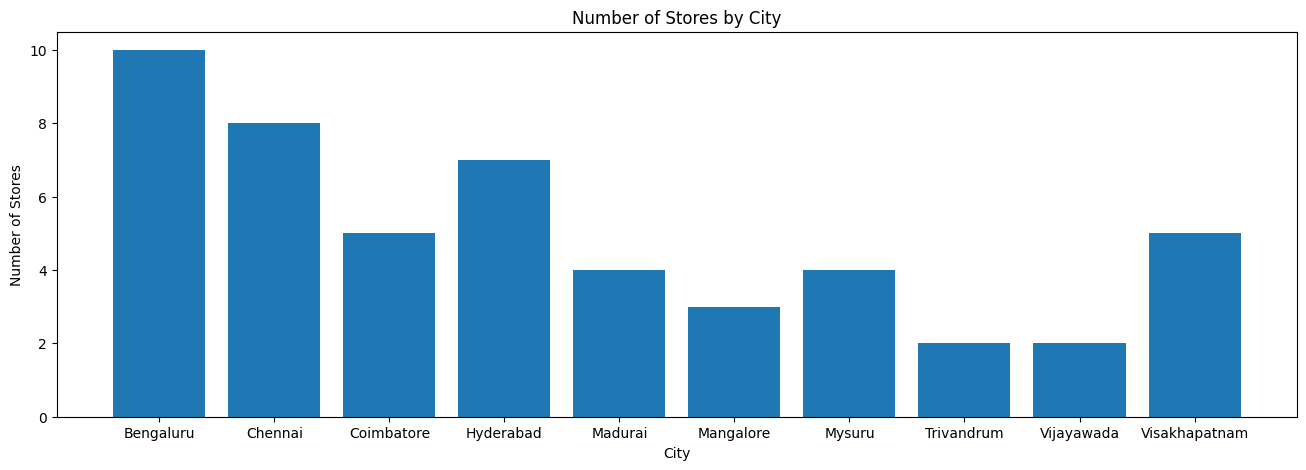

In [28]:
#Group by city and count store IDS
city_store_counts = df_stores.groupby('city')['store_id'].nunique().reset_index()

# Rename for clarity
city_store_counts.columns = ['city', 'store_count']

#Plot bar chart
plt.figure(figsize=(16,5))
plt.bar(city_store_counts['city'],city_store_counts['store_count'])
plt.xlabel('City')
plt.ylabel('Number of Stores')
plt.title('Number of Stores by City')
plt.show()


####  Analyze the total quantity sold after promotion for the Sankranti campaign across different product categories. What percentage does each category contribute to the overall sales, and what insights can be drawn from these contributions? (Hint: Use a pie chart to visualize percentage contribution of each category to the overall sales

During the Sankranti campaign, Grocery & Staples dominated post-promotion sales, contributing 70.5% of the total quantity sold. Home Appliances ranked second with 14.1%, followed by Home Care at 6.7%. Combo1 and Personal Care accounted for 4.9% and 3.7% respectively, representing the smallest shares. This distribution indicates that Grocery & Staples products were the primary driver of sales during the campaign, likely due to their high demand during the festival season. The significantly smaller shares for other categories suggest that promotional strategies for these products were either less effective or that consumer preference was strongly skewed towards essential household items during this period.

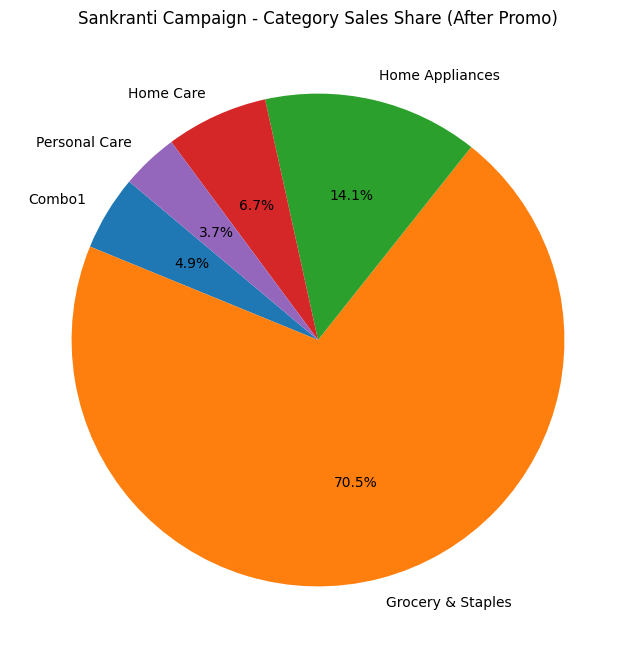

In [32]:
df_sankranti = df[df['campaign_name'] == 'Sankranti']

category_sales = (
    df_sankranti.groupby('category')['quantity_sold(after_promo)']
    .sum()
    .reset_index()
)

plt.figure(figsize=(8, 8))
plt.pie(
    category_sales['quantity_sold(after_promo)'],
    labels=category_sales['category'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Sankranti Campaign - Category Sales Share (After Promo)')
plt.show()


#### Examine the correlation between base price (after the promotion) and sales quantities (after the promotion). What insights can be drawn regarding the relationship between base price and sales quantities after the promotion? (Hint: Use heatmap to get the correlation)

The heatmap shows a weak positive correlation (0.27) between base price (after the promotion) and quantity sold (after the promotion). This suggests that, in this dataset, higher prices after promotions are slightly associated with higher sales quantities, which is somewhat counterintuitive compared to the typical expectation of an inverse relationship between price and demand. This weak correlation indicates that other factors—such as product type, brand loyalty, or the nature of the promotion—may have played a larger role in influencing sales volumes than price alone.

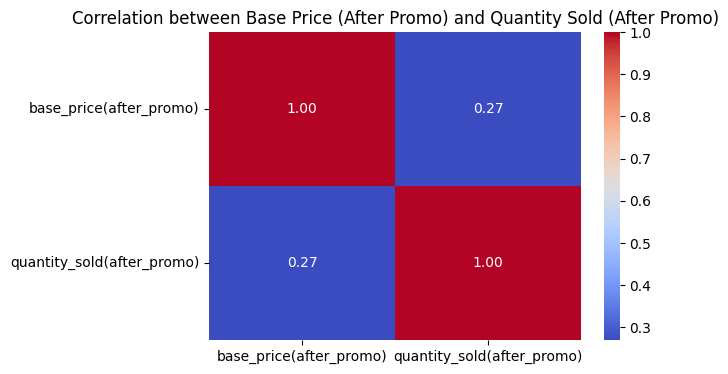

In [33]:
import seaborn as sns


# Select relevant columns
corr = df[['base_price(after_promo)', 'quantity_sold(after_promo)']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Base Price (After Promo) and Quantity Sold (After Promo)')
plt.show()


#### Analyze the distribution of quantity sold before the promotion for each product category (Grocery & Staples, Home Care, Personal Care, Home Appliances,etc.). What patterns or trends do you observe across these categories, and how could these insights inform future promotional strategies? (Hint: Use individual histograms to visualize the distribution)

The histograms reveal distinct sales distribution patterns across product categories before the promotion. Grocery & Staples shows a wide spread in quantities sold, with many products achieving moderate to high sales, indicating consistent demand across a broad range. Home Care, Personal Care, and Home Appliances display more concentrated distributions, with most products selling in lower quantities, suggesting a narrower but steady demand. Combo1 exhibits a varied distribution with some high-selling products but generally lower sales frequency. These patterns suggest that promotional strategies for Grocery & Staples could focus on reinforcing already strong demand, while for categories like Home Care and Personal Care, targeted promotions might help boost the lower-volume products. Combo1 could benefit from highlighting high-performing combinations to attract more customers.

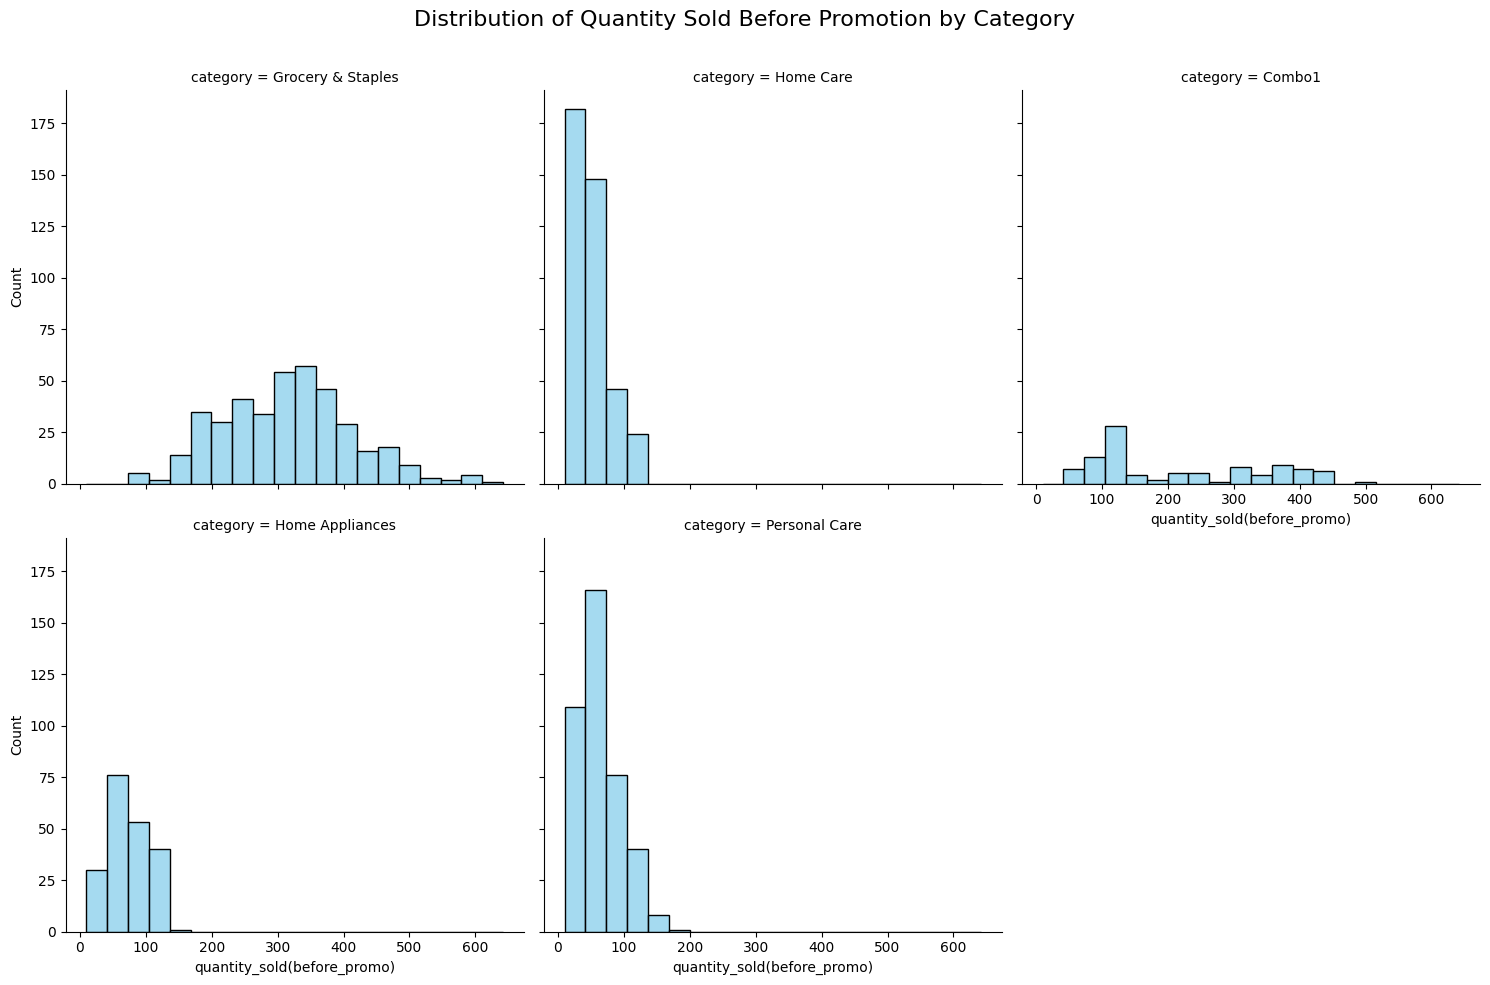

In [34]:

# Create individual histograms by category
sns.displot(
    data=df,
    x='quantity_sold(before_promo)',  # The column to plot
    col='category',                   # Separate plot for each category
    col_wrap=3,                        # Number of plots per row
    bins=20,                           # Adjust bin size
    kde=False,                         # No KDE line
    color='skyblue'
)

plt.subplots_adjust(top=0.9)
plt.suptitle('Distribution of Quantity Sold Before Promotion by Category', fontsize=16)
plt.show()


#### Analyze the incremental sold units percentage (ISU%) across various cities. Identify the city with the highest ISU% after the promotion and the city with the smallest change. What trends can be observed about the effectiveness of promotions in driving sales across these cities? (Hint: Use a line chart to visualize the ISU% comparison across cities)

The line chart shows that Madurai recorded the highest Incremental Sold Units Percentage (ISU%) after the promotion, reaching around 121%, indicating a significant boost in sales. In contrast, Visakhapatnam had the smallest change, with an ISU% of approximately 99%, suggesting that the promotion had minimal impact there. Overall, the trend indicates that while certain cities like Madurai, Bengaluru, and Coimbatore experienced strong sales growth from promotions, others such as Mangalore and Visakhapatnam saw only modest improvements. This suggests that promotional effectiveness varies notably across regions, and future campaigns could be tailored to focus on cities with historically higher responsiveness while exploring new strategies for lower-performing markets.

/var/folders/j7/cjg4ppcx069_q5g82f26rgvh0000gn/T/ipykernel_2926/1419090987.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  isu_df = df.groupby('city').apply(


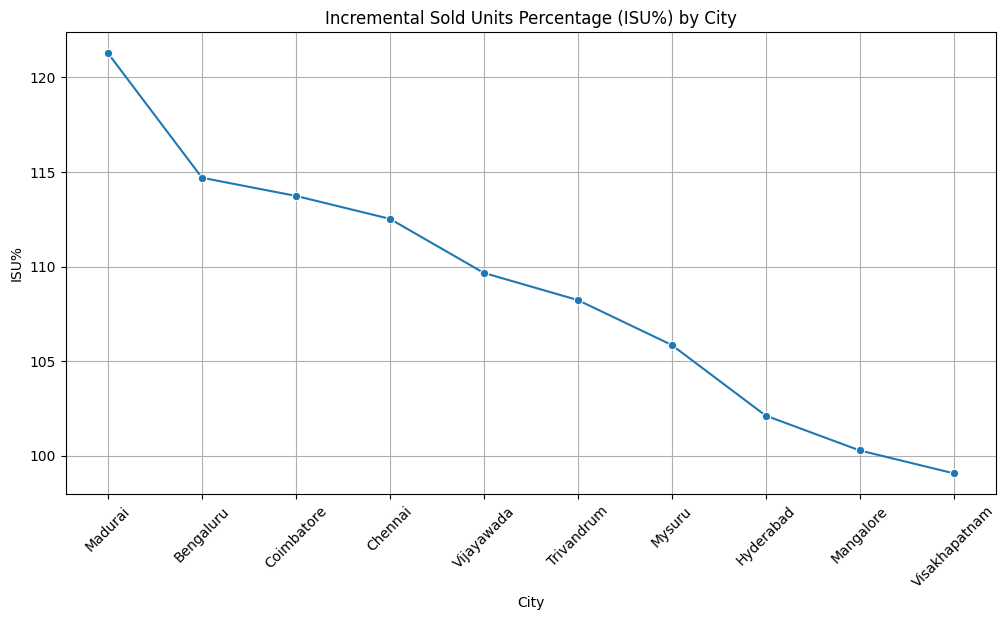

In [35]:

# ISU% = ((after_promo - before_promo) / before_promo) * 100
isu_df = df.groupby('city').apply(
    lambda x: ((x['quantity_sold(after_promo)'].sum() - x['quantity_sold(before_promo)'].sum()) /
               x['quantity_sold(before_promo)'].sum()) * 100
).reset_index(name='ISU%')

# Sort cities for better readability
isu_df = isu_df.sort_values('ISU%', ascending=False)

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=isu_df, x='city', y='ISU%', marker='o')
plt.xticks(rotation=45)
plt.title('Incremental Sold Units Percentage (ISU%) by City')
plt.xlabel('City')
plt.ylabel('ISU%')
plt.grid(True)
plt.show()


#### Analyze the relationship between incremental revenue and incremental sold units for different promotion types in Hyderabad. Which promotion type led to the highest incremental sold units, and which one generated the highest incremental revenue? What insights can you draw from the balance between the two metrics for this city? (Hint: Use a scatter plot to analyze the relationship)

The scatter plot shows that in Hyderabad, the BOGOF (Buy One Get One Free) promotion generated the highest incremental sold units, reaching around 24,000 units, indicating a strong boost in sales volume. In contrast, the 500 Cashback promotion produced the highest incremental revenue, exceeding ₹12 million, but with significantly fewer incremental units compared to BOGOF. Discount-based offers like 33% OFF and 50% OFF delivered moderate improvements in both metrics, while 25% OFF had minimal impact. These results suggest that BOGOF is highly effective in driving volume, whereas cashback promotions excel in revenue generation, highlighting the need to balance promotional strategies depending on whether the objective is to maximize sales quantity or revenue.

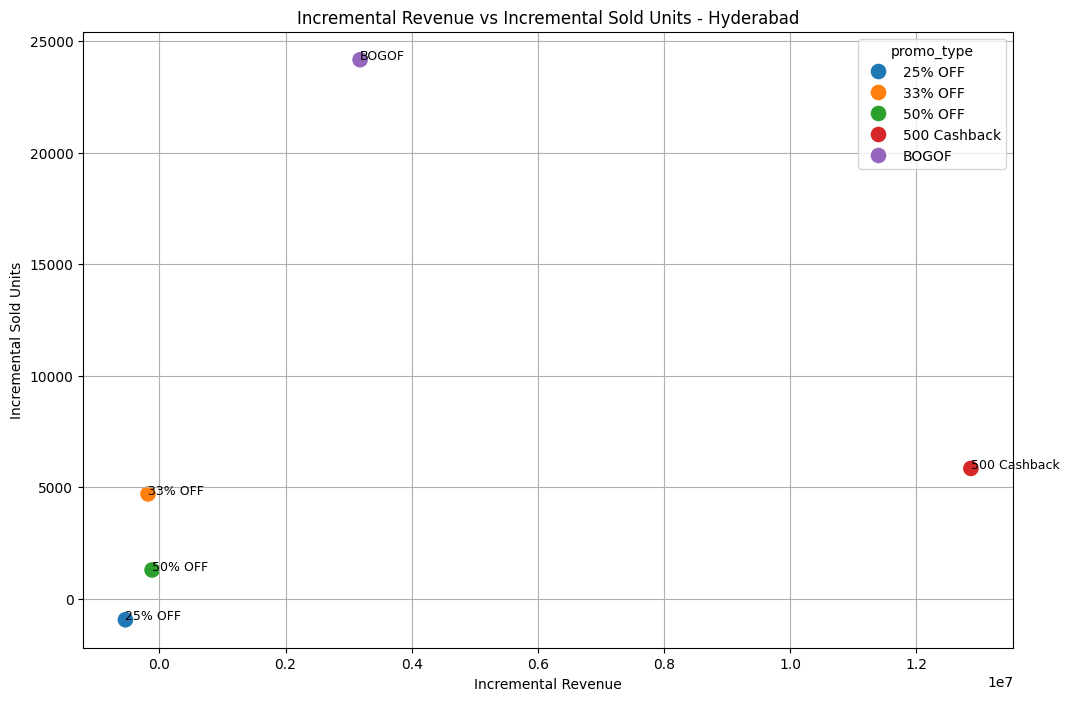

In [38]:

# Filter data for Hyderabad
df_hyd = df[df['city'] == 'Hyderabad'].copy()

# Calculate Incremental Sold Units (ISU) and Incremental Revenue (IR)
df_hyd['ISU'] = df_hyd['quantity_sold(after_promo)'] - df_hyd['quantity_sold(before_promo)']
df_hyd['IR'] = (df_hyd['base_price(after_promo)'] * df_hyd['quantity_sold(after_promo)']) - \
               (df_hyd['base_price(before_promo)'] * df_hyd['quantity_sold(before_promo)'])

# Group by promo type to aggregate totals
promo_summary = df_hyd.groupby('promo_type').agg({
    'ISU': 'sum',
    'IR': 'sum'
}).reset_index()

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=promo_summary,
    x='IR',
    y='ISU',
    hue='promo_type',
    s=150
)

# Annotate each point with the promo_type name
for i in range(promo_summary.shape[0]):
    plt.text(
        promo_summary['IR'][i] + 10,
        promo_summary['ISU'][i],
        promo_summary['promo_type'][i],
        fontsize=9
    )

plt.title('Incremental Revenue vs Incremental Sold Units - Hyderabad')
plt.xlabel('Incremental Revenue')
plt.ylabel('Incremental Sold Units')
plt.grid(True)
plt.show()


#### Analyze the revenue before and after promotions across different product categories in Bengaluru. What trends can be identified in the performance of each category, and how did promotions impact overall revenue in the city? (Hint: Use a vertical bar chart to compare the revenue before and after promotions)

The vertical bar chart shows that in Bengaluru, promotions had a significant positive impact on revenue across most product categories. Combo1 experienced the largest increase, with revenue after promotion surging well beyond its pre-promotion level, indicating a strong consumer response. Grocery & Staples, Home Appliances, and Home Care also saw notable revenue gains post-promotion, suggesting that discounts or offers effectively boosted sales in these categories. In contrast, Personal Care showed a slight decline in revenue after the promotion, indicating limited effectiveness for this category. Overall, the data suggests that while promotions substantially enhanced revenue in high-demand categories like Combo1 and Grocery & Staples, certain categories may require different promotional strategies to achieve better results.

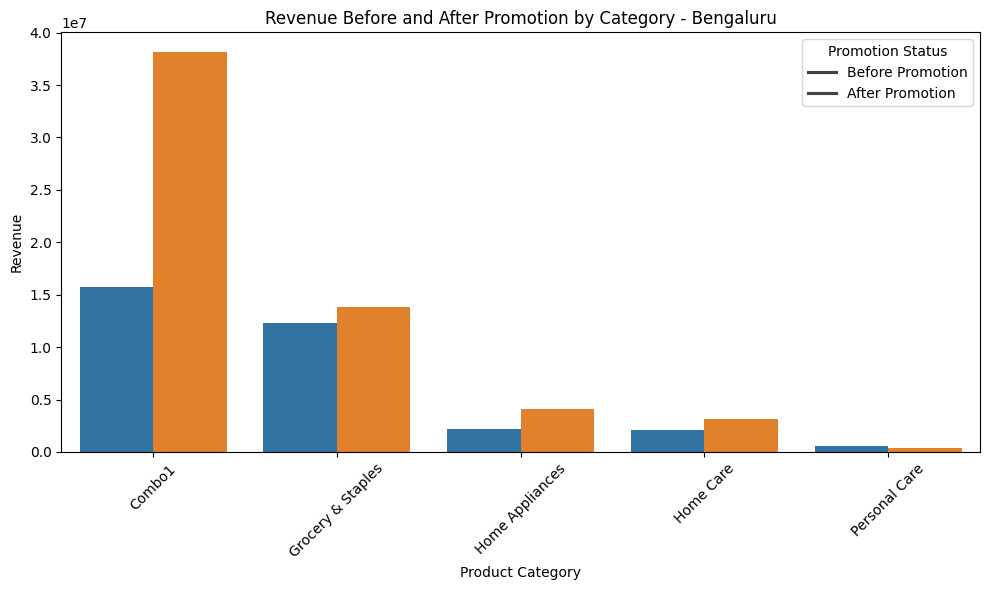

In [39]:

# Filter data for Bengaluru
df_blr = df[df['city'] == 'Bengaluru'].copy()

# Calculate revenue before and after promotion
df_blr['revenue_before'] = df_blr['base_price(before_promo)'] * df_blr['quantity_sold(before_promo)']
df_blr['revenue_after'] = df_blr['base_price(after_promo)'] * df_blr['quantity_sold(after_promo)']

# Group by category and sum revenues
revenue_summary = df_blr.groupby('category')[['revenue_before', 'revenue_after']].sum().reset_index()

# Melt to long format for Seaborn
revenue_melted = revenue_summary.melt(id_vars='category',
                                      value_vars=['revenue_before', 'revenue_after'],
                                      var_name='Promotion_Status',
                                      value_name='Revenue')

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_melted, x='category', y='Revenue', hue='Promotion_Status')

plt.title('Revenue Before and After Promotion by Category - Bengaluru')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Promotion Status', labels=['Before Promotion', 'After Promotion'])
plt.tight_layout()
plt.show()
